## Câu 1:
Cho dữ liệu lưu trong tập tin "weather.csv"
1. Hãy đọc dữ liệu và lưu vào trong DataFrame 'weather'
2. In một số thông tin tổng quát về dữ liệu
3. Cho biết số lượng dòng, cột của DataFrame
4. Hãy cho biết dữ liệu có chứa các giá trị 'NULL' không?
5. Xóa các cột 'WT10', 'WT11', 'WT15', 'WT19'
6. In 3 dòng đầu tiền và 3 dòng cuối cùng của DataFrame
7. Dùng Pandas vẽ biểu đồ dạng Box của 3 cột 'TMIN', 'TAVG', 'TMAX' và tiêu đề là 'Biểu đồ thời tiết'
8. Thêm 1 cột dữ liệu 'TDIFF' là sự chênh lệch dữ liệu 'TMAX' - 'TMIN'
9. Dùng Pandas vẽ biểu đồ histogram của dữ liệu 'TDIFF' với 30 bins và giới hạn trục x là 0 và lưu biểu đồ vào tập tin "tdiff.png"
10. Tạo một DataFrame 'bad_weather' mới từ các cột 'WT01' đến 'WT22'
11. Tạo một cột mới 'bad_weather' trên DataFrame 'weather' bằng cách tính tổng theo cột trên DataFrame 'bad_weather'
12. Điền các giá trị còn thiếu trên cột 'bad_weather' là 0 và chuyển kiểu dữ liệu của cột là int
13. Dùng matplotlib vẽ và lưu (trong tập tin "bad_weather.png") biểu đồ histogram của cột dữ liệu 'bad_weather'. Thiết lập số bins là 10, tiêu đề là 'Thời tiết', màu là 'green'
14. Lưu dữ liệu trong dataframe 'weather' thành tập tin 'weather.xlsx' với sheetname là 'weather'

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

1. Hãy đọc dữ liệu và lưu vào trong DataFrame 'weather'

In [2]:
weather = pd.read_csv('./weather.csv')
weather.head()

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00379423,2005-01-03,NaN,NaN,48.0,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00379423,2005-01-04,NaN,NaN,54.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00379423,2005-01-05,NaN,NaN,44.0,31.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2. In một số thông tin tổng quát về dữ liệu

In [3]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8022 entries, 0 to 8021
Data columns (total 26 columns):
STATION    8022 non-null object
DATE       8022 non-null object
AWND       4017 non-null float64
TAVG       1217 non-null float64
TMAX       8005 non-null float64
TMIN       7996 non-null float64
WT01       1777 non-null float64
WT02       221 non-null float64
WT03       227 non-null float64
WT04       119 non-null float64
WT05       360 non-null float64
WT06       25 non-null float64
WT07       79 non-null float64
WT08       404 non-null float64
WT09       69 non-null float64
WT10       2 non-null float64
WT11       3 non-null float64
WT13       1175 non-null float64
WT14       575 non-null float64
WT15       6 non-null float64
WT16       1326 non-null float64
WT17       12 non-null float64
WT18       345 non-null float64
WT19       4 non-null float64
WT21       18 non-null float64
WT22       32 non-null float64
dtypes: float64(24), object(2)
memory usage: 1.6+ MB


In [4]:
weather.describe()

,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,WT05,WT06,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
count,4017.000000,1217.000000,8005.000000,7996.000000,1777.0,221.0,227.0,119.0,360.0,25.0,...,3.0,1175.0,575.0,6.0,1326.0,12.0,345.0,4.0,18.0,32.0
mean,8.593707,52.493016,61.247096,42.099425,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,3.364601,17.829792,18.495043,17.386667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.220000,6.000000,13.000000,-10.000000,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,6.260000,39.000000,46.000000,29.000000,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,8.050000,54.000000,62.000000,42.000000,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,10.290000,68.000000,77.000000,57.000000,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,26.840000,86.000000,102.000000,77.000000,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


3. Cho biết số lượng dòng, cột của DataFrame

In [5]:
print('Number of rows:', weather.shape[0])
print('Number of columns:', weather.shape[1])

Number of rows: 8022
Number of columns: 26


4. Hãy cho biết dữ liệu có chứa các giá trị 'NULL' không?

In [6]:
count_false = 0
count_true = 0
for item in weather.isnull().any():
    if item == False:
        count_false += 1
    if item == True:
        count_true += 1
print('Number of null value:', count_true)
print('Number of non-null value:', count_false)

Number of null value: 24
Number of non-null value: 2


5. Xóa các cột 'WT10', 'WT11', 'WT15', 'WT19'
6. In 3 dòng đầu tiền và 3 dòng cuối cùng của DataFrame

In [7]:
weather.drop(['WT10', 'WT11', 'WT15', 'WT19'], axis=1, inplace=True)
weather.head(3)

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT07,WT08,WT09,WT13,WT14,WT16,WT17,WT18,WT21,WT22
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00379423,2005-01-03,NaN,NaN,48.0,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
weather.tail(3)

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT07,WT08,WT09,WT13,WT14,WT16,WT17,WT18,WT21,WT22
8019,USW00014765,2015-12-29,12.53,33.0,40.0,28.0,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8020,USW00014765,2015-12-30,6.93,30.0,35.0,27.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8021,USW00014765,2015-12-31,8.05,39.0,50.0,35.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


7. Dùng Pandas vẽ biểu đồ dạng Box của 3 cột 'TMIN', 'TAVG', 'TMAX' và tiêu đề là 'Biểu đồ thời tiết'

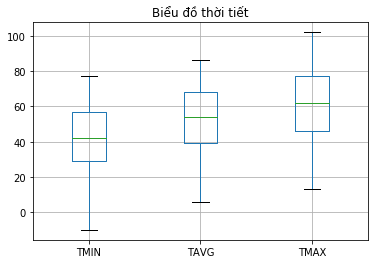

In [9]:
weather.boxplot(column=['TMIN', 'TAVG', 'TMAX'])
plt.title('Biểu đồ thời tiết')
plt.show()

8. Thêm 1 cột dữ liệu 'TDIFF' là sự chênh lệch dữ liệu 'TMAX' - 'TMIN'


In [10]:
weather['TDIFF'] = weather['TMAX'] - weather['TMIN']
weather.head()

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT08,WT09,WT13,WT14,WT16,WT17,WT18,WT21,WT22,TDIFF
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0
2,USC00379423,2005-01-03,NaN,NaN,48.0,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0
3,USC00379423,2005-01-04,NaN,NaN,54.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0
4,USC00379423,2005-01-05,NaN,NaN,44.0,31.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0


9. Dùng Pandas vẽ biểu đồ histogram của dữ liệu 'TDIFF' với 30 bins và giới hạn trục x là 0 và lưu biểu đồ vào tập tin "tdiff.png"

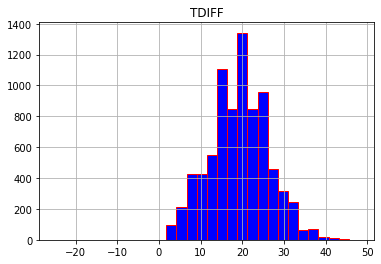

In [11]:
weather.hist(column='TDIFF', color='b', edgecolor='r', bins=30, xrot=0)
plt.savefig('tdiff.png')
plt.show()

10. Tạo một DataFrame 'bad_weather' mới từ các cột 'WT01' đến 'WT22'

In [12]:
bad_weather = weather[weather.columns[6:-1]]
bad_weather.head()

,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT13,WT14,WT16,WT17,WT18,WT21,WT22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


11. Tạo một cột mới 'bad_weather' trên DataFrame 'weather' bằng cách tính tổng theo cột trên DataFrame 'bad_weather'

In [13]:
bad_weather['bad weather'] = bad_weather.sum(axis=1)
bad_weather.head()

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT13,WT14,WT16,WT17,WT18,WT21,WT22,bad weather
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


12. Điền các giá trị còn thiếu trên cột 'bad_weather' là 0 và chuyển kiểu dữ liệu của cột là int

In [14]:
bad_weather['bad weather'].replace('', 0, inplace=True)
bad_weather

c:\program files\python36\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT13,WT14,WT16,WT17,WT18,WT21,WT22,bad weather
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8017,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
8018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
8019,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
8020,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [15]:
bad_weather['bad weather'].astype('int')

0       0
1       0
2       0
3       0
4       0
       ..
8017    1
8018    0
8019    3
8020    2
8021    1
Name: bad weather, Length: 8022, dtype: int32

13. Dùng matplotlib vẽ và lưu (trong tập tin "bad_weather.png") biểu đồ histogram của cột dữ liệu 'bad_weather'. Thiết lập số bins là 10, tiêu đề là 'Thời tiết', màu là 'green'

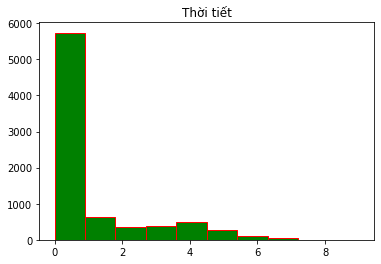

In [16]:
plt.hist(bad_weather['bad weather'], bins=10, color='g', edgecolor='r')
plt.title('Thời tiết')
plt.savefig('bad_weather.png')
plt.show()

14. Lưu dữ liệu trong dataframe 'weather' thành tập tin 'weather.xlsx' với sheetname là 'weather'

In [17]:
weather.to_excel('weather.xlsx', sheet_name='weather')